# Exploratory Data Analysis in Action - EDA: Targets



In this section we explore the [_Arial Bombing Data Set_](https://www.kaggle.com/usaf/world-war-ii) and apply techniques referred to as __Exploratory Data Analysis__:

**Import statements**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Global settings**

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100
#pd.set_option('display.max_colwidth', -1)
plt.rcParams["figure.figsize"] = [15,6]

**Load data set**

In [3]:
import pickle
gdf_europe = pickle.load( open( "../datasets/gdf_europe.p", "rb" ) )
europe = pickle.load( open( "../datasets/europe.p", "rb" ) )

## Research questions 

__@Targets__
- Q1: Which cities were the 15 most frequent targets?
- Q2: How much high explosives (in tons) went down on the 25 most frequent targets?
- Q3: How did the arial attacks change over time for the 15 most frequent targeted cities?

In [4]:
df_tar = gdf_europe.copy()

In [5]:
df_tar.columns

Index(['Mission ID', 'Mission Date', 'Country', 'Aircraft Series',
       'Target Country', 'Target City', 'Target Type', 'Target Industry',
       'Target Latitude', 'Target Longitude', 'Attacking Aircraft',
       'High Explosives Weight (Tons)', 'Total Weight (Tons)', 'year', 'month',
       'day', 'Altitude (meters)', 'geometry'],
      dtype='object')

> **Q1: Which cities were the 15 most frequent targets?**

In [6]:
df_tar['Target City'].nunique()

4658

In [7]:
most_frequent_cities = df_tar['Target City'].value_counts().sort_values(ascending=False)[:15]
most_frequent_cities

BERLIN               2546
HAMBURG              1951
COLOGNE              1907
BREMEN               1880
KIEL                 1281
KASSEL               1231
MUNICH               1005
MERSEBURG            1003
FRANKFURT AM MAIN     970
BREST                 968
HANNOVER              910
VIENNA                883
MANNHEIM              855
LUDWIGSHAFEN          826
ESSEN                 810
Name: Target City, dtype: int64

In [8]:
list_most_frequent_cities = most_frequent_cities.index
df_cities = df_tar.loc[df_tar["Target City"].isin(list_most_frequent_cities)]

> **Q2: How much high explosives (in tons) went down on the 25 most frequent targets?**

In [9]:
df_cities.groupby("Target City")["High Explosives Weight (Tons)"].sum().sort_values(ascending=False)

Target City
BERLIN               65504.0
HAMBURG              51343.0
COLOGNE              44159.0
BREMEN               35293.0
VIENNA               35075.0
KIEL                 32116.0
MERSEBURG            31156.0
ESSEN                29671.0
MUNICH               28321.0
FRANKFURT AM MAIN    27664.0
KASSEL               27200.0
BREST                23870.0
HANNOVER             23785.0
MANNHEIM             20461.0
LUDWIGSHAFEN         19398.0
Name: High Explosives Weight (Tons), dtype: float64

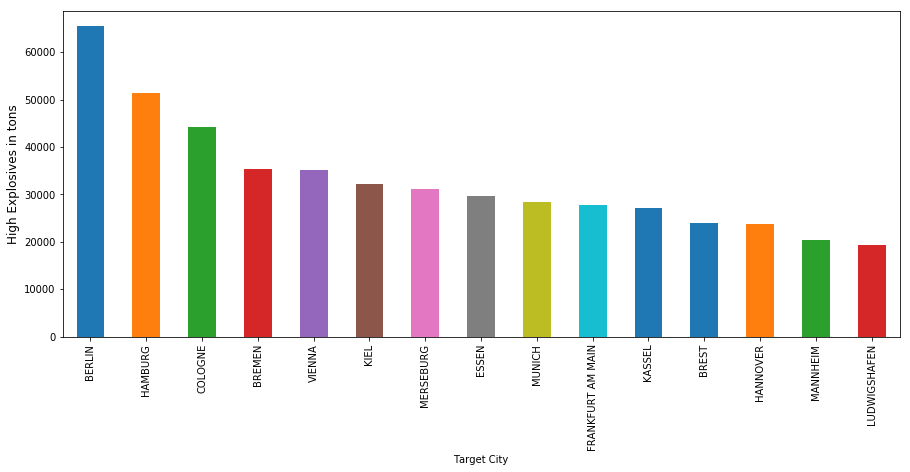

In [10]:
df_cities.groupby("Target City")["High Explosives Weight (Tons)"].sum().sort_values(ascending=False).plot.bar()
plt.ylabel("High Explosives in tons", size=12);

> **Q3: How did the arial attacks change over time for the 15 most frequent targeted cities?**

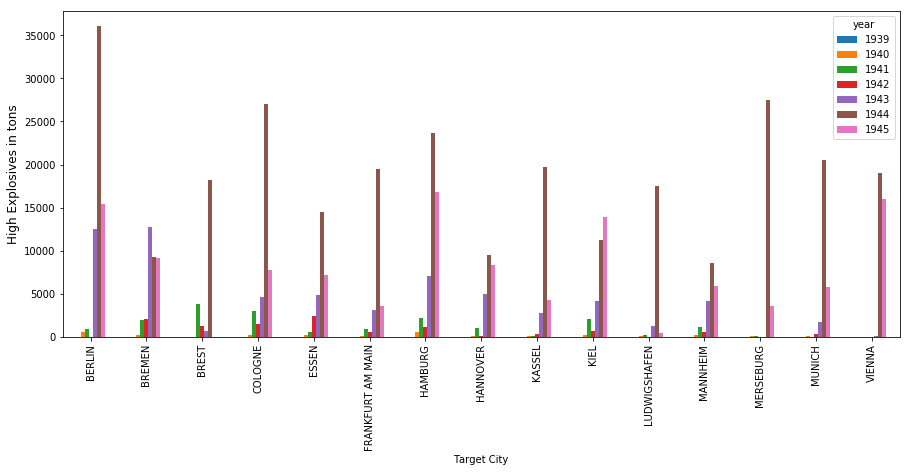

In [11]:
(df_cities.groupby(["Target City", "year"])["High Explosives Weight (Tons)"].
 sum().
 sort_values(ascending=False).
 unstack().
 plot.bar())
plt.ylabel("High Explosives in tons", size=12);

In [12]:
df_daily_index=pd.date_range(start=df_cities["Mission Date"].min(), end=df_cities["Mission Date"].max(), freq="d")
df_cities.set_index("Mission Date", inplace=True)

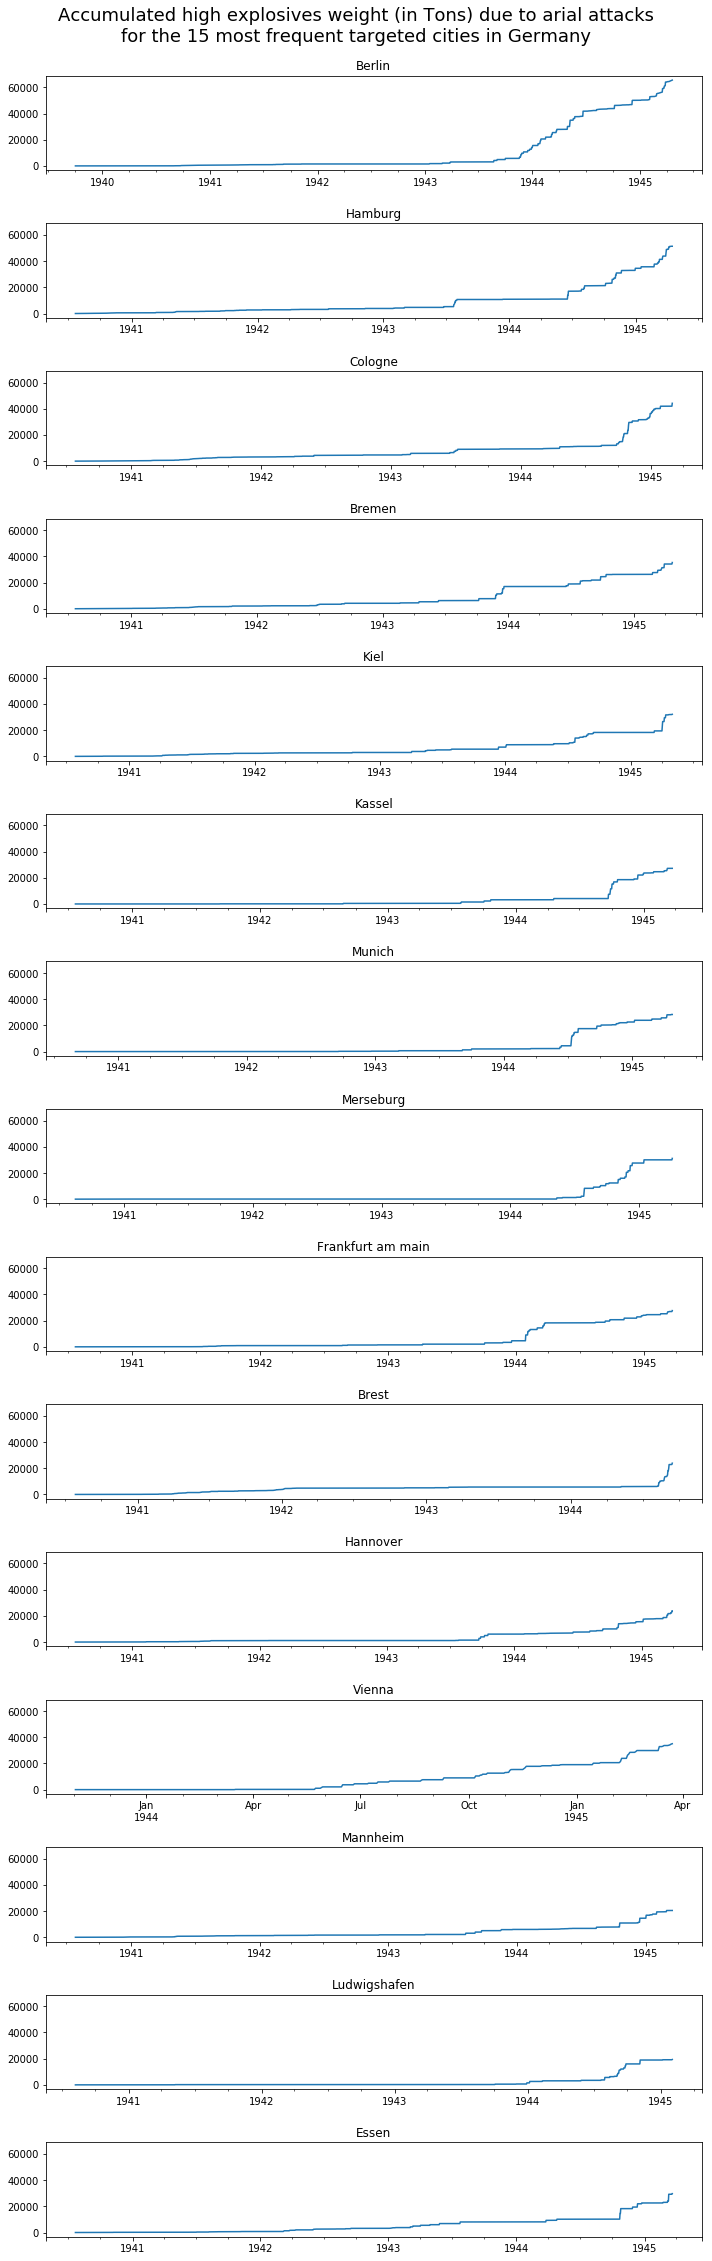

In [13]:
fig, ax = plt.subplots(15,1,sharey=True, figsize=(10,32)) 
for e, city in enumerate(list_most_frequent_cities):
    s = df_cities.loc[df_cities["Target City"]==city, "High Explosives Weight (Tons)"].resample("d").sum()
    s = s.reindex(df_daily_index)
    s.cumsum().plot(ax=ax[e])
    ax[e].set_title(city.capitalize())
plt.tight_layout()
plt.suptitle("Accumulated high explosives weight (in Tons) due to arial attacks\nfor the 15 most frequent targeted cities in Germany", size=18)
plt.subplots_adjust(top=0.95)